In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("../data/titanic/train.csv")
test = pd.read_csv("../data/titanic/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
variaveis = ['Sex_binario', 'Age']

In [5]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [6]:
def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0
train['Sex_binario'] = train['Sex'].map(transformar_sexo)

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [8]:
variveis = ['Sex_binario', 'Age']

In [9]:
x = train[variaveis]
y = train['Survived']

In [10]:
x.head()

,Sex_binario,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [11]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [12]:
x = x.fillna(-1)

In [13]:
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

In [14]:
modelo.fit(x,y)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [15]:
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

In [16]:
x_test = test[variaveis]
x_test = x_test.fillna(-1)
x_test.head()

,Sex_binario,Age
0,0,34.5
1,1,47.0
2,0,62.0
3,0,27.0
4,1,22.0


In [17]:
p = modelo.predict(x_test)
p

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [18]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [20]:
np.random.seed(0)
x_treino, x_valid, y_treino, y_valid = train_test_split(x, y, test_size=0.5)

In [21]:
x_treino.head()

,Sex_binario,Age
213,0,30.0
586,0,47.0
499,0,24.0
821,0,27.0
246,1,25.0


In [22]:
x_treino.shape, x_valid.shape, y_treino.shape, y_valid.shape

((445, 2), (446, 2), (445,), (446,))

In [23]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(x_treino, y_treino)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [24]:
p = modelo.predict(x_valid)

In [25]:
np.mean(y_valid == p)

np.float64(0.7690582959641256)

In [26]:
p = (x_valid['Sex_binario'] == 1).astype(np.int64)
np.mean(y_valid == p)

np.float64(0.7825112107623319)

In [27]:
x_falso = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x_falso

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

In [29]:
kf = KFold(2, shuffle=True, random_state=0)
for linhas_treino, linhas_valid in kf.split(x_falso):
    print("Treino:", linhas_treino)
    print("Valid:", linhas_valid)
    print()

Treino: [0 3 5 6 7]
Valid: [1 2 4 8 9]

Treino: [1 2 4 8 9]
Valid: [0 3 5 6 7]



In [36]:
resultados = []
kf = RepeatedKFold(n_splits=2,n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(x):
        print("Treino:", linhas_treino.shape[0])
        print("Valid:", linhas_valid.shape[0])
    
        x_treino, x_valid = x.iloc[linhas_treino], x.iloc[linhas_valid]
        y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    
        modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
        modelo.fit(x_treino, y_treino)
    
        p = modelo.predict(x_valid)
    
        acc = np.mean(y_valid == p)
        resultados.append(acc)
        print("Acc:", acc)
        print()
        
        #print(x_treino.head())
        #print()

Treino: 445
Valid: 446
Acc: 0.7511210762331838

Treino: 446
Valid: 445
Acc: 0.7617977528089888

Treino: 445
Valid: 446
Acc: 0.7533632286995515

Treino: 446
Valid: 445
Acc: 0.7595505617977528

Treino: 445
Valid: 446
Acc: 0.7690582959641256

Treino: 446
Valid: 445
Acc: 0.7573033707865169

Treino: 445
Valid: 446
Acc: 0.7399103139013453

Treino: 446
Valid: 445
Acc: 0.7595505617977528

Treino: 445
Valid: 446
Acc: 0.7354260089686099

Treino: 446
Valid: 445
Acc: 0.797752808988764

Treino: 445
Valid: 446
Acc: 0.7690582959641256

Treino: 446
Valid: 445
Acc: 0.7640449438202247

Treino: 445
Valid: 446
Acc: 0.7757847533632287

Treino: 446
Valid: 445
Acc: 0.7573033707865169

Treino: 445
Valid: 446
Acc: 0.7556053811659192

Treino: 446
Valid: 445
Acc: 0.7640449438202247

Treino: 445
Valid: 446
Acc: 0.7443946188340808

Treino: 446
Valid: 445
Acc: 0.7595505617977528

Treino: 445
Valid: 446
Acc: 0.7533632286995515

Treino: 446
Valid: 445
Acc: 0.7640449438202247



In [37]:
resultados

[np.float64(0.7511210762331838),
 np.float64(0.7617977528089888),
 np.float64(0.7533632286995515),
 np.float64(0.7595505617977528),
 np.float64(0.7690582959641256),
 np.float64(0.7573033707865169),
 np.float64(0.7399103139013453),
 np.float64(0.7595505617977528),
 np.float64(0.7354260089686099),
 np.float64(0.797752808988764),
 np.float64(0.7690582959641256),
 np.float64(0.7640449438202247),
 np.float64(0.7757847533632287),
 np.float64(0.7573033707865169),
 np.float64(0.7556053811659192),
 np.float64(0.7640449438202247),
 np.float64(0.7443946188340808),
 np.float64(0.7595505617977528),
 np.float64(0.7533632286995515),
 np.float64(0.7640449438202247)]

In [41]:
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\anton\Documents\Meus Projetos\Machine Learning\titanic-eda\venv\Lib\site-packages\IPython\core\magics\pylab.py:166: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


(array([2., 1., 3., 6., 4., 2., 1., 0., 0., 1.]),
 array([0.73542601, 0.74165869, 0.74789137, 0.75412405, 0.76035673,
        0.76658941, 0.77282209, 0.77905477, 0.78528745, 0.79152013,
        0.79775281]),
 <BarContainer object of 10 artists>)

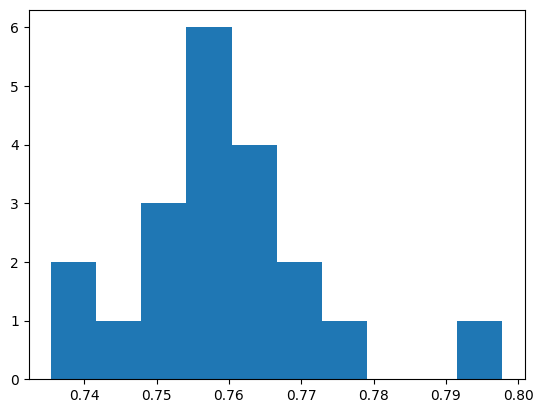

In [42]:
pylab.hist(resultados)

In [38]:
resultados

[np.float64(0.7511210762331838),
 np.float64(0.7617977528089888),
 np.float64(0.7533632286995515),
 np.float64(0.7595505617977528),
 np.float64(0.7690582959641256),
 np.float64(0.7573033707865169),
 np.float64(0.7399103139013453),
 np.float64(0.7595505617977528),
 np.float64(0.7354260089686099),
 np.float64(0.797752808988764),
 np.float64(0.7690582959641256),
 np.float64(0.7640449438202247),
 np.float64(0.7757847533632287),
 np.float64(0.7573033707865169),
 np.float64(0.7556053811659192),
 np.float64(0.7640449438202247),
 np.float64(0.7443946188340808),
 np.float64(0.7595505617977528),
 np.float64(0.7533632286995515),
 np.float64(0.7640449438202247)]

np.float64(0.7550007557817302)

In [33]:
# Criar Submission

In [34]:
sub = pd.Series(p, index = test['PassengerId'], name='Survived')
sub

ValueError: Length of values (445) does not match length of index (418)

In [ ]:
sub.to_csv('primeiro_modelo.csv', header=True)

In [ ]:
modelo.feature_importances_

In [ ]:
modelo.n_estimators

In [ ]:
accuracy = modelo.score(x, y)
accuracy